# <center><font size=7>TME 1 - Arbres de décision, sélection de modèles</font></center>

# <center><font size=6>L’essentiel sur les arbres de décision</font></center>

## Exercice 1 – Entropie (partie optionnelle)

### Q 1.1

In [1]:
import numpy as np
from collections import Counter
import pickle

def entropie(vect):
    ylen = float(vect.size)
    if ylen <= 1:
        return 0
    freq = np.array(list(Counter(vect).values()))/ylen
    return -np.nan_to_num(np.sum(freq*np.log2(freq)))

x=np.array([1,2,1,2,4,5,6])
print("#"*50)
print("test la fonction entropie",entropie(x))
print("#"*50)

##################################################
test la fonction entropie 2.2359263506290326
##################################################


### Q 1.2

In [2]:
def entropie_cond(y_list):
    h, total = 0.,0.
    for y in y_list:
        h += len(y)*entropie(y)
        total += len(y)
    return h/total

### Q 1.3

In [3]:
# data : tableau ( films , features ) , id2titles : dictionnaire id -> titre ,
# fields : id feature -> nom
[data,id2titles, fields]= pickle.load(open("imdb_extrait.pkl","rb"))
# la derniere colonne est le vote
datax = data [: ,:32]
datay = np . array ([1 if x [33] >6.5 else -1 for x in data ])

In [4]:
 print("#"*50)
print("Calcul de la différence entre l’entropie et l’entropie conditionnelle pour chaque attribut:")
differenceDeEntropieEtEntropieConditionnelle=[] #la différence entre l’entropie et l’entropie conditionnelle pour chaque attribut
databinaire=data[: ,:29].T
entrCondDataX=entropie_cond(databinaire)
for i in range(databinaire.shape[0]):
    differenceDeEntropieEtEntropieConditionnelle.append(entropie(databinaire[i])-entrCondDataX)
print(29-np.argmin(np.abs(differenceDeEntropieEtEntropieConditionnelle)))    #car on a transforme la matrice de data,donc la première en fait est la dernier
#print(differenceDeEntropieEtEntropieConditionnelle)
print("#"*50)

##################################################
Calcul de la différence entre l’entropie et l’entropie conditionnelle pour chaque attribut:
29
##################################################


 Lorsque nous calculons la différence d entre l'entropie et l'entropie conditionnelle H(Y)-H(Y|X), différents cas se présentent: Nous interpretons les valeurs obtenues comme suit:<br>
-d=0: Ceci voudrait dire que H(Y)=H(Y|X). Donc, Y et X sont indépendants, autrement dit, la réalisation de l'un des deux n'affectent en aucun cas la probabilité de la réalisation de l'autre<br>
-d=1 (normalisé): Pour cela, H(Y)=1 et H(Y|X)=0. Dans ce cas, et pour H(Y)=1, l'entropie est maximale Le meilleur attribut pour la première partition est couleur

## Quelques expériences préliminaires

In [5]:
from decisiontree import DecisionTree
dt = DecisionTree ()
dt.max_depth = 5 # on fixe la taille de l ’ arbre a 5
dt.min_samples_split = 2 # nombre minimum d ’ exemples pour spliter un noeud
dt.fit(datax , datay)
dt.predict(datax[:5 ,:])
print(dt.score(datax , datay))
# dessine l ’ arbre dans un fichier pdf si pydot est installe .
dt.to_pdf("src/test_tree.pdf", fields )
# sinon utiliser http :// www . webgraphviz . com /
dt.to_dot ( fields )
# ou dans la console
print(dt.print_tree (fields ))

Pydot non disponible pour l'affichage graphique, allez sur http://www.webgraphviz.com/ pour generer un apercu de l'arbre
0.736429038587312


NameError: name 'pydot' is not defined

### Q 1.4

on essaye de lancer le programme avec la profondeur de 3,5,10,20

In [14]:
from decisiontree import DecisionTree
dt = DecisionTree ()
dt.max_depth = 3 # on fixe la taille de l ’ arbre a 5
dt.min_samples_split = 2 # nombre minimum d ’ exemples pour spliter un noeud
dt.fit(datax , datay)
dt.predict(datax[:5 ,:])
print(dt.score(datax , datay))
# dessine l ’ arbre dans un fichier pdf si pydot est installe .
dt.to_pdf("tmp/test_tree3.pdf", fields )
# sinon utiliser http :// www . webgraphviz . com /
#dt.to_dot ( fields )
# ou dans la console
#print(dt.print_tree (fields ))

0.7183344233703945


NameError: name 'pydot' is not defined

In [ ]:
from decisiontree import DecisionTree
dt = DecisionTree ()
dt.max_depth = 5 # on fixe la taille de l ’ arbre a 5
dt.min_samples_split = 2 # nombre minimum d ’ exemples pour spliter un noeud
dt.fit(datax , datay)
dt.predict(datax[:5 ,:])
print(dt.score(datax , datay))
# dessine l ’ arbre dans un fichier pdf si pydot est installe .
dt.to_pdf("tmp/test_tree5.pdf", fields )
# sinon utiliser http :// www . webgraphviz . com /
#dt.to_dot ( fields )
# ou dans la console
#print(dt.print_tree (fields ))

In [ ]:
from decisiontree import DecisionTree
dt = DecisionTree ()
dt.max_depth = 10 # on fixe la taille de l ’ arbre a 5
dt.min_samples_split = 2 # nombre minimum d ’ exemples pour spliter un noeud
dt.fit(datax , datay)
dt.predict(datax[:5 ,:])
print(dt.score(datax , datay))
# dessine l ’ arbre dans un fichier pdf si pydot est installe .
dt.to_pdf("tmp/test_tree10.pdf", fields )
# sinon utiliser http :// www . webgraphviz . com /
#dt.to_dot ( fields )
# ou dans la console
#print(dt.print_tree (fields ))

In [ ]:
from decisiontree import DecisionTree
dt = DecisionTree ()
dt.max_depth = 20 # on fixe la taille de l ’ arbre a 5
dt.min_samples_split = 2 # nombre minimum d ’ exemples pour spliter un noeud
dt.fit(datax , datay)
dt.predict(datax[:5 ,:])
print(dt.score(datax , datay))
# dessine l ’ arbre dans un fichier pdf si pydot est installe .
dt.to_pdf("tmp/test_tree20.pdf", fields )
# sinon utiliser http :// www . webgraphviz . com /
#dt.to_dot ( fields )
# ou dans la console
#print(dt.print_tree (fields ))

### Q 1.5

 Lorsque la profondeur de larbre augmente, nous sommes en train de considerer plus d'attributs pour classifier. De ce fait resulte une meilleure classification en effectuant un partionnement plus fin de notre ensemble de depart
c'est normal,  car une profondeur de grande valeur spécialise plus la classification.

### Q 1.6

 Non, ces scores ne sont pas un indicateur fiable du comportement de l algorithme.car, on ne sait pas si ces scores sont meilleurs pour un ensemble de donnees general, comme nous estimons les scores sur l'ensemble d'apprentissage.
Afin de trouver un meilleur score pour la data générale, nous pourrons utiliser la validation croisée.

#  <center><font size=6>Sur et sous apprentissage</font></center>

Définition des fonctions

In [15]:
def estimationDeDecisionTree(potitonX,potitionY,DataX,DataY,dp,typeDeBut):
    x=np.random.randint(DataX.shape[0])  #Je crée un point de coupe par random
    pStart=x    #la potition de commencer de DataX qui est Data pour Apprentissage
    pEnd=int(x+DataX.shape[0]*potitonX)    #la potition de fini de DataX qui est Data pour Apprentissage
    dt = DecisionTree ()
    dt.max_depth = dp # on fixe la taille de l ’ arbre a dp
    dt.min_samples_split = 2 # nombre minimum d ’ exemples pour spliter un noeud
    DataXapp,DataYapp,DataXtest,DataYtest=0,0,0,0
    if pEnd<DataX.shape[0]:
        DataXapp=DataX[pStart:pEnd]
        pTStart=pEnd    #la potition de commencer de DataTest qui est Data pour Apprentissage
        pTEnd=pStart    #la potition de fini de DataTest qui est Data pour Apprentissage
        DataXtest=np.vstack((DataX[:pTEnd],DataX[pTStart:]))
        #pour les dataY aussi
        DataYapp=DataY[pStart:pEnd]
        DataYtest=np.hstack((DataY[:pTEnd],DataY[pTStart:]))
    else:
        DataXapp=np.vstack((DataX[pStart:],DataX[:pEnd%DataX.shape[0]]))
        pTStart=pEnd%DataX.shape[0]
        pTEnd=pStart
        DataXtest=DataX[pTStart:pTEnd]
        #pour les dataY aussi
        DataYapp=np.hstack((DataY[pStart:],DataY[:pEnd%DataY.shape[0]]))
        DataYtest=DataY[pTStart:pTEnd]
    dt.fit(DataXapp , DataYapp)
    dt.predict(DataXtest)
    #print(pStart,pEnd,pTStart,pTEnd)
    #print(DataXapp.shape,DataYapp.shape,DataXtest.shape,DataYtest.shape)
    if 'apprentissage'==typeDeBut:    #on veut savoir de socre de apprentissage
        return dt.score(DataXapp , DataYapp)
    elif 'test'==typeDeBut:    #on veut savoir de socre de test
        return dt.score(DataXtest , DataYtest)

### Q 1.7

In [16]:
#l’erreur en apprentissage
errAppLis=[1-estimationDeDecisionTree(0.2,0.8,datax,datay,10,'apprentissage'),
           1-estimationDeDecisionTree(0.5,0.5,datax,datay,10,'apprentissage'),
           1-estimationDeDecisionTree(0.8,0.2,datax,datay,10,'apprentissage')]
print(errAppLis)

[0.11777535441657583, 0.17880505887483644, 0.1834287271736168]


on trace les courbes de l’erreur en apprentissage pour  (0.2, 0.8),(0.5, 0.5),(0.8, 0.2))

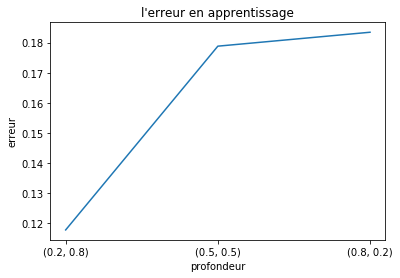

In [17]:
import matplotlib.pyplot as plt

plt.title("l'erreur en apprentissage")
plt.plot(['(0.2, 0.8)','(0.5, 0.5)','(0.8, 0.2)'], errAppLis)
plt.ylabel("erreur")
plt.xlabel("profondeur")
plt.show()


On calcule l’erreur en test en fonction de la profondeur du modèle. par exemple de partage de (0.8,0.2), et on prend de profondeur de 1 a 20

In [18]:
errAppLisParProfon=[]    #l’erreur en apprentissage de différent profondeur
for i in range(1,20):
    errAppLisParProfon.append(1-estimationDeDecisionTree(0.8,0.2,datax,datay,i,'test'))
print(errAppLisParProfon)

[0.37037037037037035, 0.3322440087145969, 0.2962962962962963, 0.2875816993464052, 0.29520697167755994, 0.2854030501089324, 0.2799564270152506, 0.2875816993464052, 0.2668845315904139, 0.2962962962962963, 0.318082788671024, 0.30283224400871456, 0.2647058823529411, 0.2995642701525054, 0.3104575163398693, 0.31917211328976036, 0.29302832244008714, 0.3224400871459695, 0.31699346405228757]


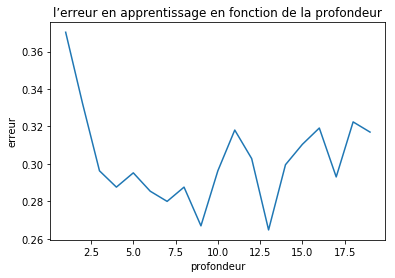

In [19]:
plt.title("l’erreur en apprentissage en fonction de la profondeur")
xaxs=[i for i in range(1,20)]
plt.ylabel("erreur")
plt.xlabel("profondeur")
plt.plot(xaxs, errAppLisParProfon)
 
plt.show()

In [20]:
errAppLisParProfon=[]    #l’erreur en apprentissage de différent profondeur
for i in range(1,20):
    errAppLisParProfon.append(1-estimationDeDecisionTree(0.8,0.2,datax,datay,i,'apprentissage'))
print(errAppLisParProfon)

[0.37094576178795313, 0.31561733442354867, 0.3079858272008722, 0.276369582992641, 0.2605614608885255, 0.24093758517307173, 0.22621967838648138, 0.20932134096484056, 0.1896974652493868, 0.1708912510220768, 0.15562823657672387, 0.15044971381847916, 0.1302807304442627, 0.11719814663396022, 0.1120196238757154, 0.11965113109839198, 0.09866448623603163, 0.1128372853638594, 0.08830744071954211]


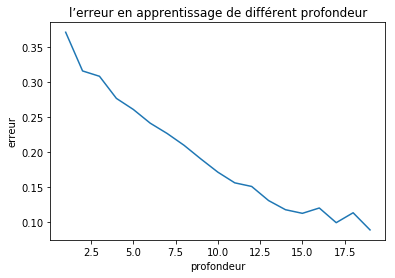

In [21]:
plt.title("l’erreur en apprentissage de différent profondeur")
xaxs=[i for i in range(1,20)]
plt.ylabel("erreur")
plt.xlabel("profondeur")
plt.plot(xaxs, errAppLisParProfon)
 
plt.show()

### Q 1.8

 Quand il y a peu d'exemples d'apprentissage, le score de prédiction est faible. D'ailleurs, nous sommes presque dans l'aléatoire. Dans le cas contraire, lorsqu'il y a beaucoup d'exemples d'apprentissage, le modèle sur-apprend et il sera pas très bon à la prédiction. Par conséquent, nous obtenons un score faible à la prédiction. D'où une faible performance.Pour la première erreur le modèle n'apprend pas suffisamment, alors que pour la deuxième erreur le modèle apprend beaucoup et il devient incapable de généraliser et donc moins flexible.

### Q 1.9

Quand la profondeur est très grande, le modèle fait plus d'erreurs.Pour améliorer les résultats, nous devons trouver un compromis entre le sur-apprentissage et le sous-apprentissage, où le modèle est bon sur les deux ensembles d'apprentissages et de test.Pour cela, nous pourrons utiliser un ensemble de validation. Ceci reste une méthode simple et efficace. Ce qui permet d'entrainer et de tester le modèle K fois sur différents sous-ensembles et d'estimer la performance sur de nouvelles données.

#  <center><font size=6>Validation croisée : sélection de modèle</font></center>

In [ ]:
def validationCroiseeParNcas(n):
    #n est nombre de ensembles d’apprentissage {Ei}
    #on defini l’ensemble d’apprentissage Eapp
    Dapp=[]    #les list de tuple de sous ensembles datax est datay d’apprentissage
    for i in range(n):
        Dapp.append((datax[int(i*datax.shape[0]/n):int((i+1)*datax.shape[0]/n)],datay[int(i*datay.shape[0]/n):int((i+1)*datay.shape[0]/n)]))
    np.random.shuffle(Dapp)

    #pour obtenir toutes les données sauf i
    def autresDonnee(i,Data):
        resultX=[]
        resultY=[]
        for j in range(len(Data)):
            if j!=i:
                if 0==len(resultX) and 0==len(resultY):
                    resultX,resultY=Data[j]
                else:
                    np.vstack((resultX,Data[j][0]))
                    np.hstack((resultY,Data[j][1]))
        return resultX,resultY
    lisErri=[]   #la list d'erreur en test err(Ei) est évaluée sur Ei
    from decisiontree import DecisionTree
    dt = DecisionTree ()
    dt.max_depth = 20 # on fixe la taille de l ’ arbre a 5
    dt.min_samples_split = 2 # nombre minimum d ’ exemples pour spliter un noeud
    for i in range(n):
        Dappi=Dapp[i]
        DataAutre=autresDonnee(i,Dapp)
        dt.fit(DataAutre[0],DataAutre[1])
        lisErri.append(1-dt.score(Dappi[0],Dappi[1]))
    #print(lisErri)
    Eapp=sum(lisErri)/n    #l’erreur moyenne
    #print(Eapp)
    return Eapp

In [ ]:
#on tester de 5 a 20 parties
lisEapp=[]   #la list de les erreurs moyennes
for n in range(5,21):
    lisEapp.append(validationCroiseeParNcas(n))

In [ ]:
plt.title("Validation croisée des erreurs moyennes sur N cas:")
xaxs=[i for i in range(5,21)]
plt.ylabel("erreurs")
plt.xlabel("N cas")
plt.plot(xaxs,lisEapp)
 
plt.show()

Avec une profondeur égale à 10, le modèle fait le moins d'erreur, estimé à 0.31